In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Logistic Regression

Usada comumente para classificação binária, ou seja, estimar a probabilidade de uma instância pertencer a uma classe ou outra. Se a probabilidade estimada for maior que 50%, então a instância é classificada como pertencente à primeira classe (chamada de classe positiva, que seria o "1"), caso contrário, é classificada como pertencente à segunda classe (chamada de classe negativa, que seria o "0"). Isto faz com que a regressão logística seja uma boa escolha para problemas de classificação binária.

In [3]:
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
X = iris["data"][:, 3:]  # largura da pétala
y = (iris["target"] == 2).astype(int)  # 1 se Iris virginica, caso contrário 0

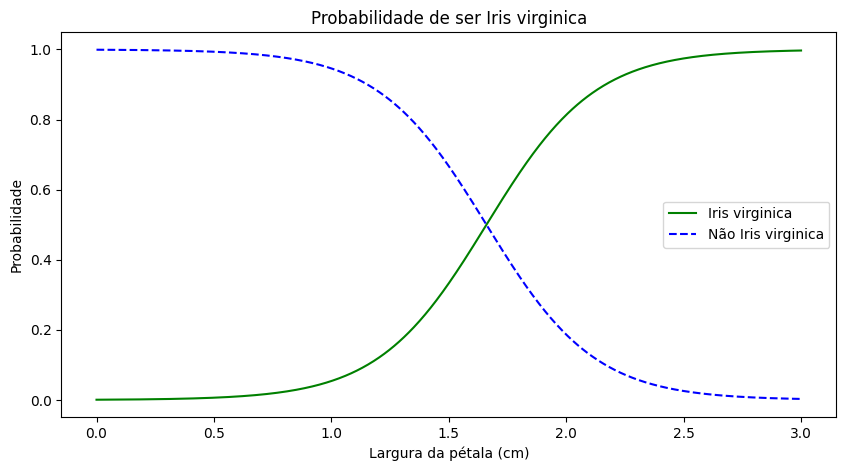

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Não Iris virginica")
plt.xlabel("Largura da pétala (cm)")
plt.ylabel("Probabilidade")
plt.title("Probabilidade de ser Iris virginica")
plt.legend()


In [6]:
log_reg.predict([[1.7], [1.5]]) # 1.7 e 1.5 são larguras de pétalas

array([1, 0])

A resposta array([1, 0]) representa que a largura da pétala de 1.7 é de uma Iris-virginica e a largura da sépala de 1.5 não pode ser de uma Iris-virginica.

## Softmax Regression

A regressão softmax ou regressão multinomial é uma generalização da regressão logística que suporta a classificação de instâncias em uma classe dentre múltiplas classes. Em outras palavras, ela é capaz de lidar com problemas de classificação de múltiplas classes sem a necessidade de treinar e combinar múltiplos classificadores binários (como feito anteriormente para a classificação de flores Iris).

Enquanto a regressão logística é utilizada para problemas de classificação binária (duas classes), a regressão softmax é usada para problemas de classificação com mais de duas classes.

O exemplo mencionado da classificação de flores Iris (um problema com três classes) ilustra bem a utilidade da regressão softmax. Antes, seria necessário usar três classificadores binários (um para cada par de classes), mas com a regressão softmax, é possível treinar um único modelo que pode classificar diretamente em uma das três classes.

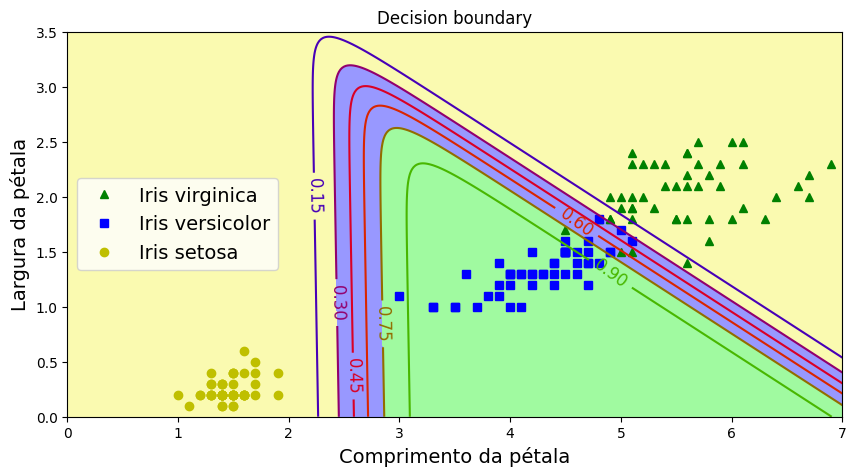

In [18]:
# fazer grafico de decision boundary

X = iris["data"][:, (2, 3)]  # comprimento da pétala, largura da pétala
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)

plt.figure(figsize=(10, 5))

plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")

plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")

plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz1, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Decision boundary")
plt.show()

## Cross Entropy

A função de custo utilizada na regressão logística é a função de entropia cruzada (log loss). A entropia cruzada é frequentemente utilizada para medir o quão bem um conjunto de probabilidades estimadas (como as saídas de um classificador) corresponde a uma classe alvo (como a classe alvo no conjunto de treinamento).

A entropia cruzada é comumente utilizada como função de custo na regressão logística. Ela mede a diferença entre as probabilidades previstas pelo modelo e as classes reais das instâncias. A entropia cruzada é dada por:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})$$

Onde:

- $y^{(i)}$ é a classe alvo da i-ésima instância de treinamento.
- $\hat{p}^{(i)}$ é a probabilidade estimada da i-ésima instância de treinamento pertencer à classe positiva.

A entropia cruzada é zero quando a probabilidade estimada pelo modelo coincide perfeitamente com a classe alvo real. Por exemplo, se a classe real é 1 e o modelo prevê uma probabilidade de 1 (ou 100%), ou se a classe real é 0 e o modelo prevê uma probabilidade de 0.